In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [49]:
import pandas as pd
import pandas as pd
import json
import sys
import os
import gc
import pickle
import numpy as np
import matplotlib.pyplot as plt


In [37]:
!pip install opendatasets
import opendatasets as od

od.download("https://www.kaggle.com/datasets/grouplens/movielens-20m-dataset")

Skipping, found downloaded files in "./movielens-20m-dataset" (use force=True to force download)


In [38]:
rating = pd.read_csv("/content/movielens-20m-dataset/rating.csv")

In [39]:
movie = pd.read_csv("/content/movielens-20m-dataset/movie.csv")

In [50]:
movie_columns = ['movie_id', 'title', 'genres']
movie = pd.DataFrame(movie, columns=movie_columns)
movie['movie_id'] = range(1, len(movie) + 1)

In [51]:
movie.head(5)

,movie_id,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [52]:
print(movie.describe())



           movie_id
count  27278.000000
mean   13639.500000
std     7874.624658
min        1.000000
25%     6820.250000
50%    13639.500000
75%    20458.750000
max    27278.000000


In [53]:
print("Missing Values:")
print(movie.isnull().sum())

Missing Values:
movie_id    0
title       0
genres      0
dtype: int64


In [54]:
genre_counts = movie['genres'].str.split('|', expand=True).stack().value_counts()
print("Genre Counts:")
print(genre_counts)

Genre Counts:
Drama                 13344
Comedy                 8374
Thriller               4178
Romance                4127
Action                 3520
Crime                  2939
Horror                 2611
Documentary            2471
Adventure              2329
Sci-Fi                 1743
Mystery                1514
Fantasy                1412
War                    1194
Children               1139
Musical                1036
Animation              1027
Western                 676
Film-Noir               330
(no genres listed)      246
IMAX                    196
dtype: int64


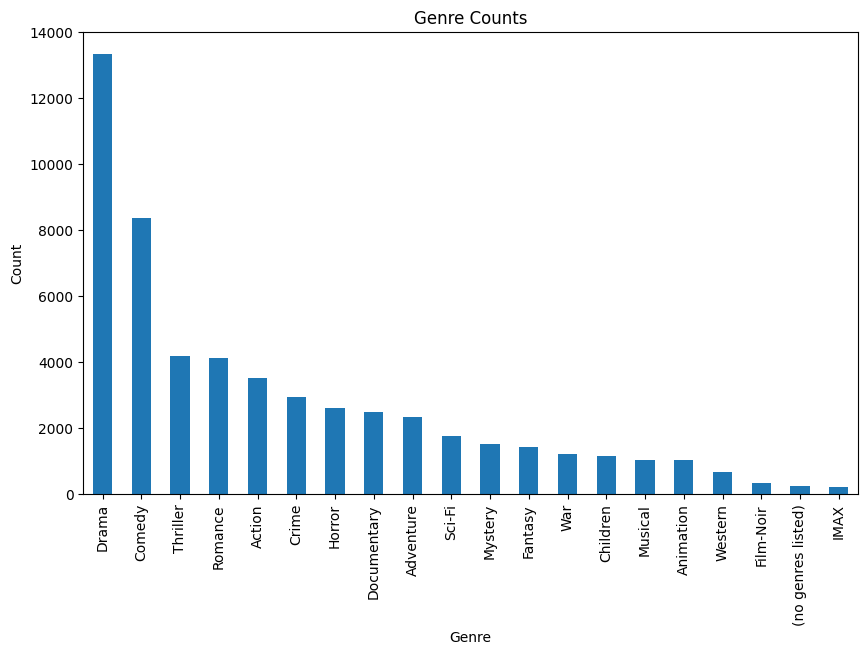

In [55]:
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar')
plt.title('Genre Counts')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

In [56]:
movie['year'] = movie['title'].str.extract(r'\((\d{4})\)')
year_counts = movie['year'].value_counts().sort_index()
print("Movie Counts by Year:")
print(year_counts)

Movie Counts by Year:
1891       1
1893       1
1894       2
1895       2
1896       2
        ... 
2011    1016
2012    1022
2013    1011
2014     740
2015     120
Name: year, Length: 118, dtype: int64


In [69]:
rating.columns


Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [70]:
rating.shape

(1000, 4)

In [71]:
movie_id = np.sort(rating["movieId"].unique())

In [72]:
len(movie_id)

698

In [73]:
user_item_df = pd.DataFrame({"user_id": [], **{m_id: [] for m_id in movie_id}})
predicted_ratings_df=user_item_df
user_item_df

,user_id,1,2,3,6,7,10,11,15,16,...,7454,7482,7757,8368,8482,8507,8636,8690,8961,31696


In [74]:
user_rating = rating.groupby('userId').agg({'movieId': list, 'rating': list}).reset_index()
user_rating


,userId,movieId,rating
0,1,"[2, 29, 32, 47, 50, 112, 151, 223, 253, 260, 2...","[3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 4.0, 4.0, 4.0, ..."
1,2,"[3, 62, 70, 110, 242, 260, 266, 469, 480, 541,...","[4.0, 5.0, 5.0, 4.0, 3.0, 5.0, 5.0, 3.0, 5.0, ..."
2,3,"[1, 24, 32, 50, 160, 173, 175, 196, 223, 260, ...","[4.0, 3.0, 4.0, 5.0, 3.0, 2.0, 5.0, 3.0, 5.0, ..."
3,4,"[6, 10, 19, 32, 165, 329, 350, 356, 367, 368, ...","[3.0, 4.0, 3.0, 1.0, 3.0, 3.0, 4.0, 4.0, 3.0, ..."
4,5,"[2, 11, 17, 60, 62, 104, 110, 140, 141, 150, 2...","[3.0, 5.0, 3.0, 3.0, 5.0, 2.0, 4.0, 2.0, 5.0, ..."
5,6,"[1, 3, 7, 17, 52, 62, 135, 140, 141, 260, 494,...","[5.0, 3.0, 5.0, 5.0, 5.0, 5.0, 3.0, 4.0, 5.0, ..."
6,7,"[3, 7, 11, 15, 16, 17, 24, 105, 122, 151, 252,...","[3.0, 3.0, 4.0, 2.0, 3.0, 2.0, 3.0, 2.0, 2.0, ..."
7,8,"[1, 3, 6, 10, 19, 21, 39, 47, 48, 110, 150, 15...","[4.0, 5.0, 3.0, 4.0, 1.0, 4.0, 3.0, 5.0, 4.0, ..."
8,9,"[356, 858, 1219, 1911, 1923, 1997, 2279, 2605,...","[4.0, 5.0, 3.0, 3.0, 4.0, 5.0, 3.0, 2.0, 3.0, ..."
9,10,"[1, 11, 25, 260, 356, 527, 858, 912, 969, 1094...","[4.0, 4.0, 4.0, 4.0, 3.0, 5.0, 5.0, 4.0, 4.0, ..."


In [75]:
for index, user in user_rating.iterrows():
    # Extract user ID and ratings for the current user
    user_id = user['userId']
    movie_ratingss = user['rating']
    movie_ids = user['movieId']
    # Create a dictionary to store user-item ratings
    user_movie_ratings = {movie_id: rating for movie_id, rating in zip(movie_ids, movie_ratingss)}
    # Add user ID and item ratings to df_user_item DataFrame
    user_movie_ratings={"user_id":user_id}
    user_item_df=user_item_df.append(user_movie_ratings, ignore_index=True)



<ipython-input-75-464281f2e6c7>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  user_item_df=user_item_df.append(user_movie_ratings, ignore_index=True)
<ipython-input-75-464281f2e6c7>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  user_item_df=user_item_df.append(user_movie_ratings, ignore_index=True)
<ipython-input-75-464281f2e6c7>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  user_item_df=user_item_df.append(user_movie_ratings, ignore_index=True)
<ipython-input-75-464281f2e6c7>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  user_item_df=user_item_df.append(user_movie_ratings, ignore_index=True)
<ipython-input-75-464281f2e6

In [76]:
user_item_df

,user_id,1,2,3,6,7,10,11,15,16,...,7454,7482,7757,8368,8482,8507,8636,8690,8961,31696
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
user_item_df.fillna(0, inplace=True)
user_item_df

,user_id,1,2,3,6,7,10,11,15,16,...,7454,7482,7757,8368,8482,8507,8636,8690,8961,31696
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Predicting the NAN Values

In [78]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
# to predict this we have refer a document https://realpython.com/build-recommendation-engine-collaborative-filtering/
def weighted_avg(user_rating_matrix , user_index, movie_index):

    # Calculating Cosine similarity to fid similar users
    similarities = cosine_similarity(user_rating_matrix )
    similar_users = similarities[user_index]

    # Finding  similar users who have rated the movie
    rated_indices = np.where(user_rating_matrix [:, movie_index] != 0)[0]

    # Calculate weighted average
    weighted_sum = 0
    similarity_sum = 0
    for index in rated_indices:
        similarity = similar_users[index]
        rating = user_rating_matrix [index, movie_index]
        weighted_sum += similarity * rating
        similarity_sum += similarity

    if similarity_sum == 0:
        return 0
    else:
        return weighted_sum / similarity_sum

def predict_ratings(user_rating_matrix ):
    predicted_user_rating_matrix  = np.copy(user_rating_matrix )
    total_users, total_movies = user_rating_matrix .shape

    for user_index in range(total_users):
        for movie_index in range(total_movies):
            if np.isnan(user_rating_matrix [user_index, movie_index]):
                predicted_rating = weighted_avg(user_rating_matrix , user_index, movie_index)
                predicted_user_rating_matrix [user_index, movie_index] = predicted_rating

    return predicted_user_rating_matrix

user_rating_matrix  = user_item_df.to_numpy()

predicted_ratings = predict_ratings(user_rating_matrix )



In [79]:
predicted_ratings

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 2.,  0.,  0., ...,  0.,  0.,  0.],
       [ 3.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 9.,  0.,  0., ...,  0.,  0.,  0.],
       [10.,  0.,  0., ...,  0.,  0.,  0.],
       [11.,  0.,  0., ...,  0.,  0.,  0.]])

We had predicted the rating But as time get over cannot perform any furthur